In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/content/DELL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,21.777945,22.993132,21.693752,22.440264,21.538488,13801490
1,2017-12-04,22.504812,22.521650,20.952852,21.017401,20.172804,8513645
2,2017-12-05,20.927595,21.278399,20.644144,20.899530,20.059669,6129126
3,2017-12-06,20.767628,21.182980,20.697468,21.065109,20.218596,7828790
4,2017-12-07,21.278399,21.601139,21.205433,21.298044,20.442171,7163534
...,...,...,...,...,...,...,...
1355,2023-04-24,42.700001,42.869999,42.369999,42.680000,42.680000,2814400
1356,2023-04-25,42.599998,42.669998,41.700001,41.709999,41.709999,2396000
1357,2023-04-26,41.750000,42.189999,41.470001,41.669998,41.669998,2501400
1358,2023-04-27,41.830002,42.810001,41.790001,42.799999,42.799999,2988500


In [3]:
# Extract the input features (X) and the target variable (y)
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values
y = df['Close'].values

In [4]:
train_s = int(X.shape[0]*0.7)
test_s = int(X.shape[0]*0.2)
val_s = int(X.shape[0]*0.1)

In [5]:
X_train = X[0:train_s, :]
X_test = X[train_s:train_s+test_s,:]
X_val = X[train_s+test_s:train_s+test_s+val_s,:]

In [6]:
y_train = y[ 0:train_s]
y_test = y[train_s:train_s+test_s]
y_val = y[train_s+test_s:train_s+test_s+val_s]

In [7]:
model = GradientBoostingRegressor(max_depth=4, n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [8]:
error = [mean_squared_error(y_test,y_pred) for y_pred in model.staged_predict(X_test)]
best_samples_estimators = np.argmin(error)

In [9]:
model = GradientBoostingRegressor(max_depth=4, n_estimators=best_samples_estimators, learning_rate=0.1, random_state=42)

# preTrain the model on the training set
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=99, random_state=42)

In [10]:
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
print("Validation Mean Squared Error:", val_mse)


y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error:", test_mse)

Validation Mean Squared Error: 0.5108166751760311
Test Mean Squared Error: 7.624522641402276


In [11]:
print("R2 score",model.score(X_train, y_train))

R2 score 0.9999936507670927


In [12]:
next_day_features = (df[['Open', 'High', 'Low', 'Adj Close', 'Volume']].iloc[-1]).values.reshape(1, -1)

In [13]:
predictions = []
for _ in range(30):
    next_day_prediction = model.predict(next_day_features)
    predictions.append(next_day_prediction)
    next_day_features[0, :-1] = next_day_features[0, 1:]
    next_day_features[0, -1] = next_day_prediction

print("The next 30 days:\n", predictions)

The next 30 days:
 [array([44.41936725]), array([48.92657288]), array([45.09690137]), array([50.83769076]), array([45.37130694]), array([52.46759968]), array([46.54623268]), array([52.62581381]), array([48.32132676]), array([52.63852192]), array([50.33253057]), array([52.68908047]), array([52.2540905]), array([52.6867085]), array([52.67092167]), array([52.68738741]), array([52.68738741]), array([52.68738741]), array([52.68738741]), array([52.68738741]), array([52.68738741]), array([52.68738741]), array([52.68738741]), array([52.68738741]), array([52.68738741]), array([52.68738741]), array([52.68738741]), array([52.68738741]), array([52.68738741]), array([52.68738741])]


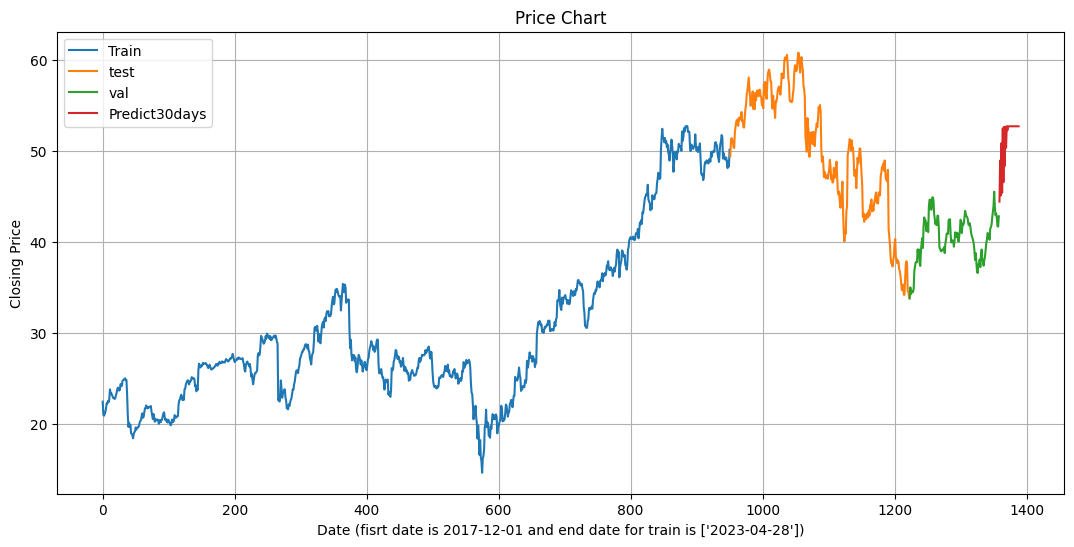

In [14]:
# Plot the price chart
plt.figure(figsize=(13, 6))
train = pd.RangeIndex(start=0, stop=train_s, step=1)
plt.plot(train,y_train)
test = pd.RangeIndex(start=train_s, stop=train_s+test_s, step=1)
plt.plot(test,y_test)
val = pd.RangeIndex(start=train_s+test_s, stop=train_s+test_s+val_s, step=1)
plt.plot(val,y_val)
test_data_index = pd.RangeIndex(start=train_s+test_s+val_s, stop=train_s+test_s+val_s+30, step=1)
plt.plot(test_data_index,predictions)
plt.xlabel('Date (fisrt date is {0} and end date for train is {1})'.format(df['Date'][0],df['Date'][-1:,].values))
plt.ylabel('Closing Price')
plt.title('Price Chart')
plt.grid(True)
plt.legend(['Train','test','val','Predict30days'])
plt.show()